### From the kaggle description:

"Reached on time: It is the target variable, where 1 Indicates that the product has ***NOT*** reached on time and 0 indicates it has reached on time."
    

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [2]:
data = pd.read_csv('Train.csv')
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
cr_count = (data['Customer_rating'].value_counts()).sort_index()
cr_count

1    2235
2    2165
3    2239
4    2189
5    2171
Name: Customer_rating, dtype: int64

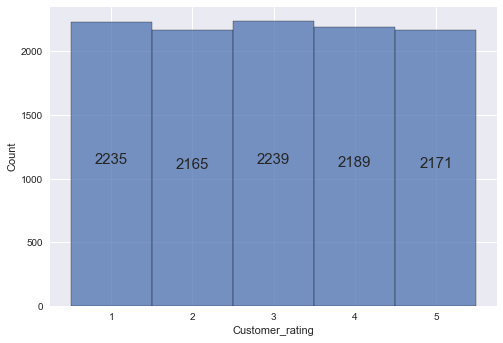

In [6]:
visual_cr_hist = sns.histplot(data['Customer_rating'], bins= 5, discrete= True)
for i in range(len(cr_count)):
    visual_cr_hist.text(i+1, cr_count.iloc[i]/2, str(cr_count.iloc[i]), fontdict= dict(fontsize= 15), horizontalalignment= 'center')

In [7]:
tot_on_time = data['Reached.on.Time_Y.N'].value_counts()
tot_on_time.index = ['Late', 'On_Time']
print('Number of deliveries made on time: \n' + str(round((tot_on_time['On_Time'] / tot_on_time.sum()) * 100, 3)) +' %')

Number of deliveries made on time: 
40.331 %


In [8]:
data.drop(['ID'], 'columns').groupby(['Product_importance']).agg([min,max,'mean'])

Customer_care_calls               Customer_rating      \
                                   min max      mean             min max   
Product_importance                                                         
high                                 2   7  3.872363               1   5   
low                                  2   7  4.110251               1   5   
medium                               2   7  4.028607               1   5   

                             Cost_of_the_Product                   \
                        mean                 min  max        mean   
Product_importance                                                  
high                2.993671                  96  307  203.871308   
low                 2.983576                  96  310  212.059845   
medium              2.997686                  96  310  209.382415   

                   Prior_purchases  ...           Discount_offered      \
                               min  ...      mean              min max   
Product_importance                  ...                                  
high                             2  ...  3.657173                1  65   
low                              2  ...  3.528224                1  65   
medium                           2  ...  3.593605                1  65   

                              Weight_in_gms                     \
                         mean           min   max         mean   
Product_importance                                               
high                14.666667          1007  6000  4005.551688   
low                 13.043043          1001  6000  3497.488956   
medium              13.483172          1001  7846  3712.050484   

                   Reached.on.Time_Y.N                
                                   min max      mean  
Product_importance                                    
high                                 0   1  0.649789  
low                                  0   1  0.592788  
medium                               0   1  0.590450  

[3 rows x 21 columns]

In [9]:
print(str(round(332/(616+332) * 100, 3)) + ' %' + '\n')
print(str(round((1-0.649789) * 100, 3)) + ' %')

data[data['Product_importance'] == 'high']['Reached.on.Time_Y.N'].value_counts()

35.021 %

35.021 %


1    616
0    332
Name: Reached.on.Time_Y.N, dtype: int64

In [10]:
on_time_pi = ((1 - data.groupby(['Product_importance'])['Reached.on.Time_Y.N'].mean()) * 100)
on_time_pi.name = 'Percentage of deliveries on time by product importance'
on_time_pi

Product_importance
high      35.021097
low       40.721163
medium    40.954985
Name: Percentage of deliveries on time by product importance, dtype: float64

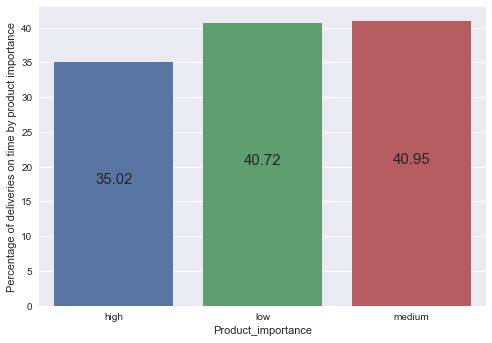

In [11]:
visual_pi = sns.barplot(x= on_time_pi.index, y= on_time_pi)
for i in range(len(on_time_pi)):
    visual_pi.text(i, on_time_pi[i]/2, str(round(on_time_pi[i], 2)), fontdict= dict(fontsize= 15), horizontalalignment= 'center')

<AxesSubplot:xlabel='Product_importance', ylabel='count'>

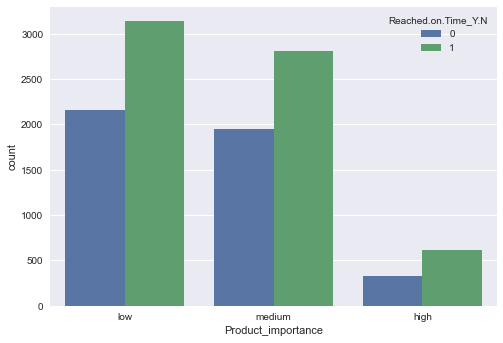

In [22]:
sns.countplot(x = "Product_importance", data = data, hue="Reached.on.Time_Y.N")

In [12]:
data.drop(['ID'], 'columns').groupby(['Mode_of_Shipment']).agg([min,max,'mean'])

Customer_care_calls               Customer_rating      \
                                 min max      mean             min max   
Mode_of_Shipment                                                         
Flight                             2   7  4.104108               1   5   
Road                               2   7  4.063068               1   5   
Ship                               2   7  4.040606               1   5   

                           Cost_of_the_Product                   \
                      mean                 min  max        mean   
Mode_of_Shipment                                                  
Flight            2.982555                  96  310  209.306697   
Road              2.995455                  97  310  210.475568   
Ship              2.991289                  96  310  210.343072   

                 Prior_purchases  ...           Discount_offered      \
                             min  ...      mean              min max   
Mode_of_Shipment                  ...                                  
Flight                         2  ...  3.566685                1  65   
Road                           2  ...  3.581250                1  65   
Ship                           2  ...  3.564594                1  65   

                            Weight_in_gms                     \
                       mean           min   max         mean   
Mode_of_Shipment                                               
Flight            13.160945          1001  5997  3629.378165   
Road              13.084091          1002  6614  3649.550568   
Ship              13.491959          1001  7846  3631.457518   

                 Reached.on.Time_Y.N                
                                 min max      mean  
Mode_of_Shipment                                    
Flight                             0   1  0.601576  
Road                               0   1  0.588068  
Ship                               0   1  0.597561  

[3 rows x 21 columns]

In [13]:
data['Mode_of_Shipment'].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

In [14]:
data.groupby(['Mode_of_Shipment', 'Reached.on.Time_Y.N'])['ID'].count()

Mode_of_Shipment  Reached.on.Time_Y.N
Flight            0                       708
                  1                      1069
Road              0                       725
                  1                      1035
Ship              0                      3003
                  1                      4459
Name: ID, dtype: int64

In [15]:
on_time_mos = ((1 - data.groupby(['Mode_of_Shipment'])['Reached.on.Time_Y.N'].mean()) * 100)
on_time_mos.name = 'Percentage of deliveries on time by method of shipment'
on_time_mos

Mode_of_Shipment
Flight    39.842431
Road      41.193182
Ship      40.243902
Name: Percentage of deliveries on time by method of shipment, dtype: float64

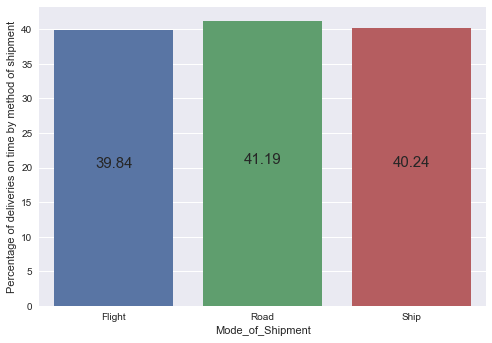

In [16]:
visual_mos = sns.barplot(x= on_time_mos.index, y= on_time_mos)
for i in range(len(on_time_mos)):
    visual_mos.text(i, on_time_mos[i]/2, str(round(on_time_mos[i], 2)), fontdict= dict(fontsize= 15), horizontalalignment= 'center')

In [17]:
data.drop(['ID'], 'columns').groupby(['Warehouse_block']).agg([min,max,'mean'])

Customer_care_calls               Customer_rating      \
                                min max      mean             min max   
Warehouse_block                                                         
A                                 2   7  4.038189               1   5   
B                                 2   7  4.020185               1   5   
C                                 2   7  4.064921               1   5   
D                                 2   7  4.053435               1   5   
F                                 2   7  4.075014               1   5   

                          Cost_of_the_Product                   \
                     mean                 min  max        mean   
Warehouse_block                                                  
A                2.957447                  96  310  208.767594   
B                2.980360                  96  310  212.159302   
C                2.993999                 101  310  211.191489   
D                3.017993                  96  310  210.907852   
F                2.996727                  96  310  209.077196   

                Prior_purchases  ...           Discount_offered      \
                            min  ...      mean              min max   
Warehouse_block                  ...                                  
A                             2  ...  3.577741                1  65   
B                             2  ...  3.575014                1  65   
C                             2  ...  3.554828                1  65   
D                             2  ...  3.601963                1  65   
F                             2  ...  3.548009                1  65   

                           Weight_in_gms                     \
                      mean           min   max         mean   
Warehouse_block                                               
A                13.222586          1004  6000  3615.448991   
B                13.187125          1001  7401  3635.701037   
C                13.399891          1005  6064  3641.331151   
D                13.093784          1005  7640  3628.846783   
F                13.668031          1001  7846  3641.387616   

                Reached.on.Time_Y.N                
                                min max      mean  
Warehouse_block                                    
A                                 0   1  0.586470  
B                                 0   1  0.602291  
C                                 0   1  0.596836  
D                                 0   1  0.597601  
F                                 0   1  0.598472  

[5 rows x 21 columns]

In [18]:
on_time_wb = ((1 - data.groupby(['Warehouse_block'])['Reached.on.Time_Y.N'].mean()) * 100)
on_time_wb.name = 'Percentage of deliveries on time by warehouse block'
on_time_wb

Warehouse_block
A    41.352973
B    39.770867
C    40.316421
D    40.239913
F    40.152755
Name: Percentage of deliveries on time by warehouse block, dtype: float64

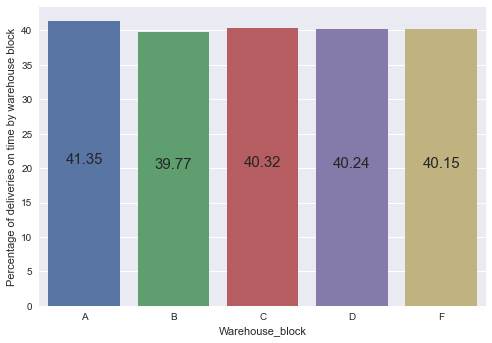

In [20]:
visual_wb = sns.barplot(x= on_time_wb.index, y= on_time_wb)
for i in range(len(on_time_wb)):
    visual_wb.text(i, on_time_wb[i]/2, str(round(on_time_wb[i], 2)), fontdict= dict(fontsize= 15), horizontalalignment= 'center')